# Linear Regression Bike Sharing Assignment

### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

The company want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

In [1]:
# importing python libraries required for the analysis
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns #for visualization
from sklearn.model_selection import train_test_split # for splitting train & test data sets
from sklearn.preprocessing import MinMaxScaler # for scaling the required variables in data set
from sklearn.linear_model import LinearRegression # linear model building
from sklearn.feature_selection import RFE # importing for Recursive Feature Elimination
from statsmodels.stats.outliers_influence import variance_inflation_factor #for VIF calculation
import statsmodels.api as sm #for model building
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the data
bike_sharing = pd.read_csv(r"C:\Users\Sowmya\Downloads\day.csv")
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_sharing.shape
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


The dataset contains no missing values in any of the columns

In [4]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Next step is Data preparation. Here we will analyze different column values and do changes as required.

As per the metadata information

* season : season (1:spring, 2:summer, 3:fall, 4:winter)
* Months : 1 to 12 representing months Jan to Dec
* weekday : represnting day of the week (Sunday through Saturday)
* weathersit : - 1: Clear, Few clouds, Partly cloudy, Partly cloudy - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [5]:
bike_sharing['season']=bike_sharing.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })

bike_sharing['mnth']=bike_sharing.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

bike_sharing['weathersit']=bike_sharing.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})

bike_sharing['weekday']=bike_sharing.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Visualising the numeric variables

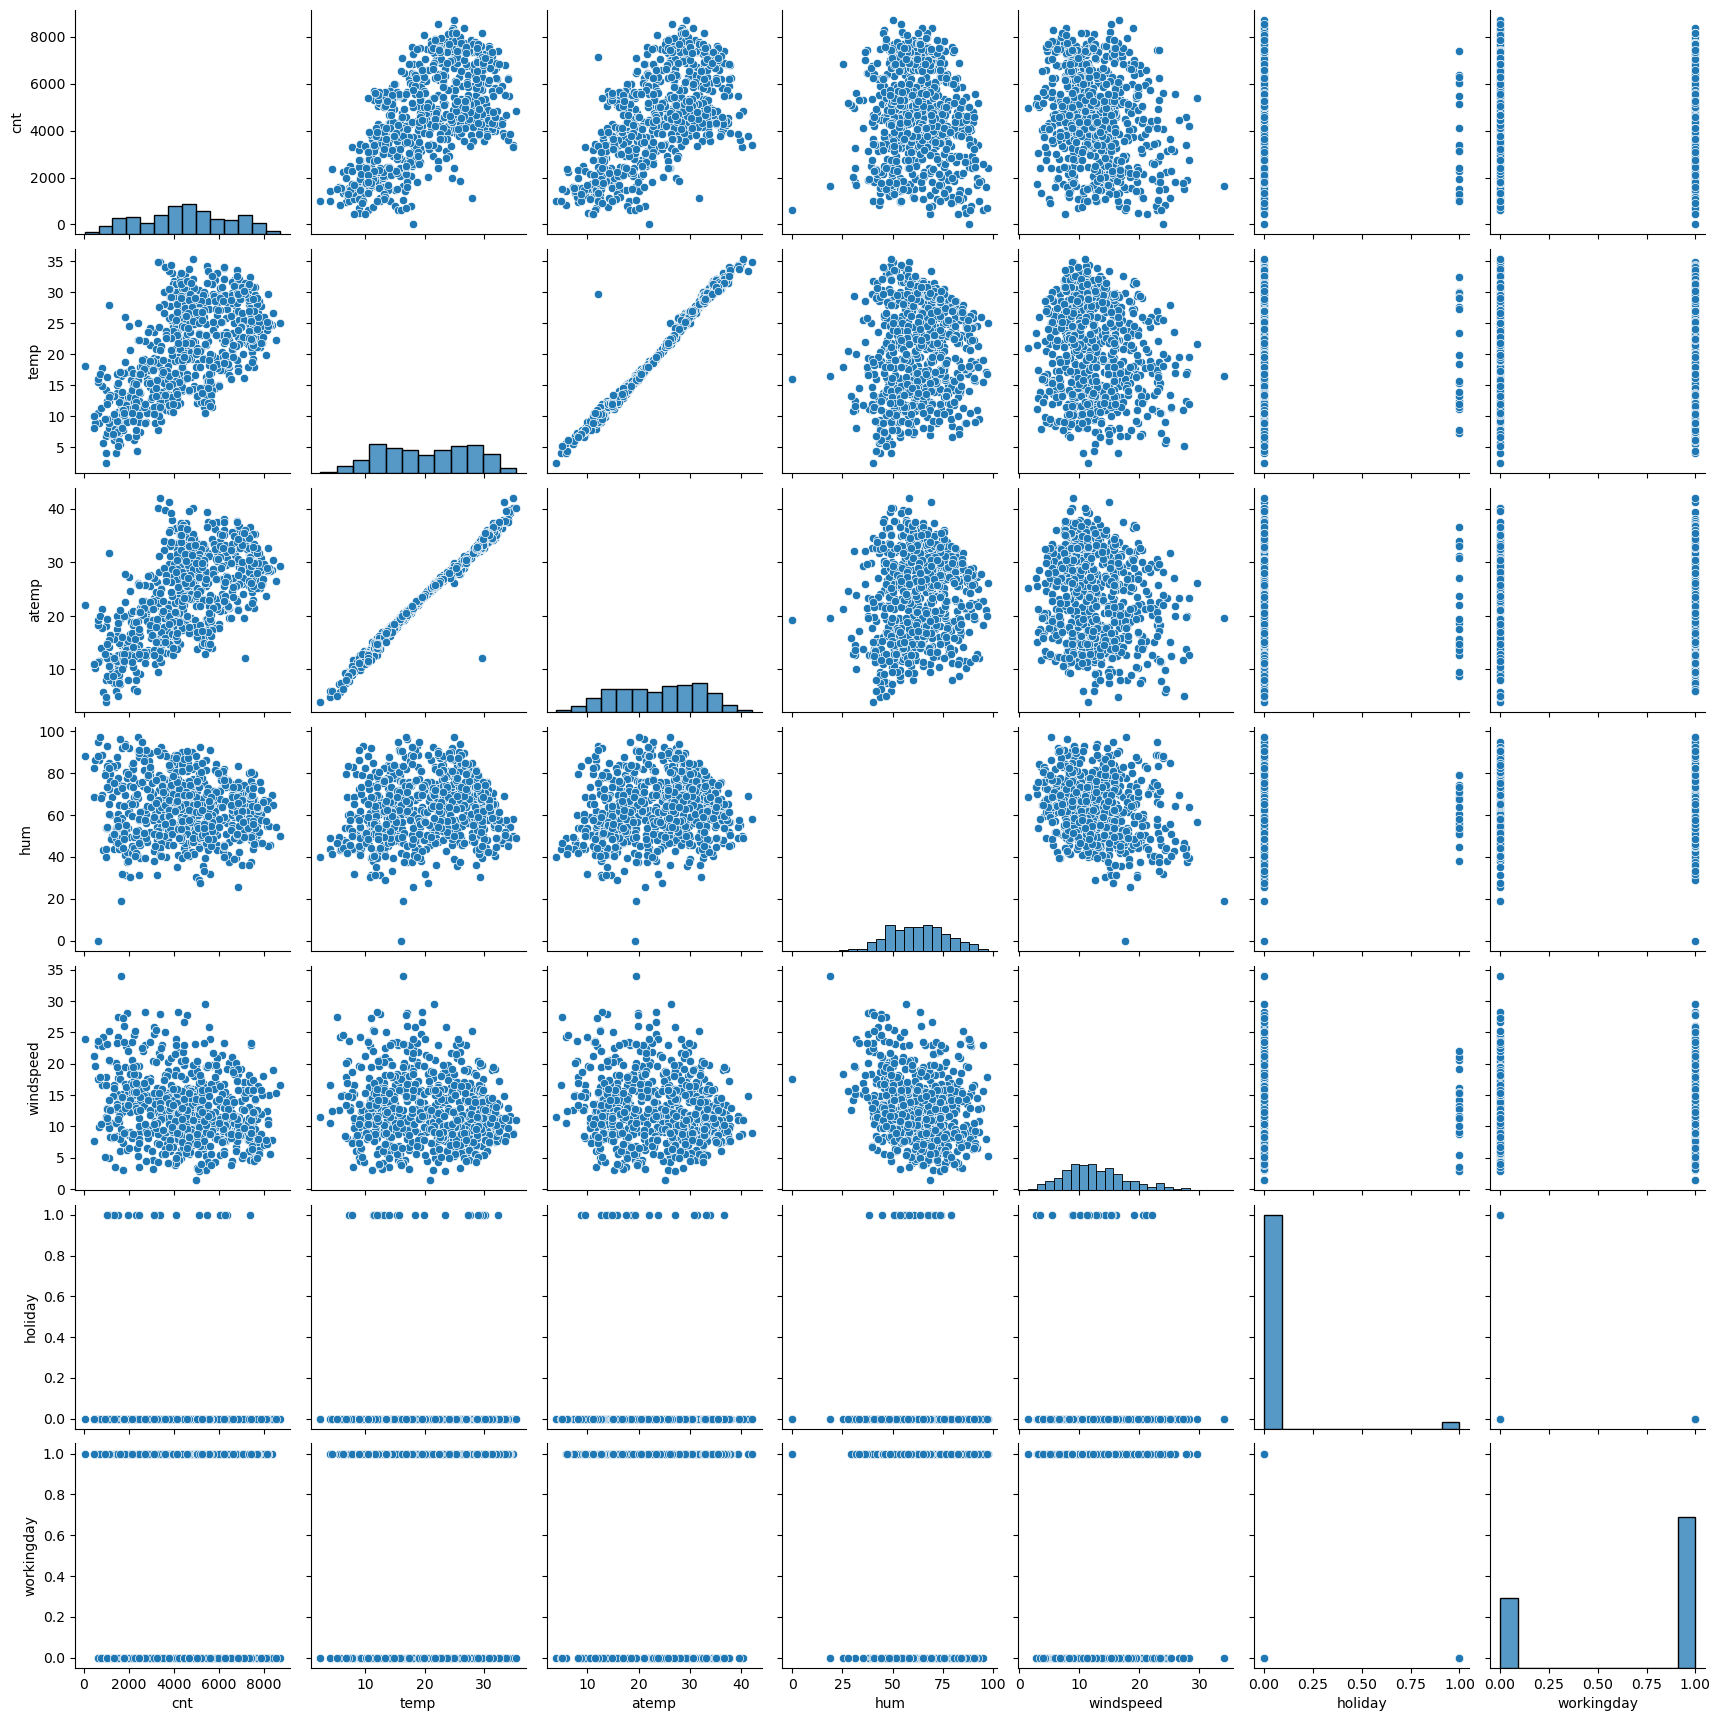

In [6]:
sns.pairplot(bike_sharing ,vars=['cnt', 'temp', 'atemp', 'hum','windspeed', 'holiday', 'workingday'])
plt.show()

In this dataset cnt and temp have positive correlation, Hence we should consider linear regression
### Visualising the categorical variables

Using box plot to visualise categorical variables

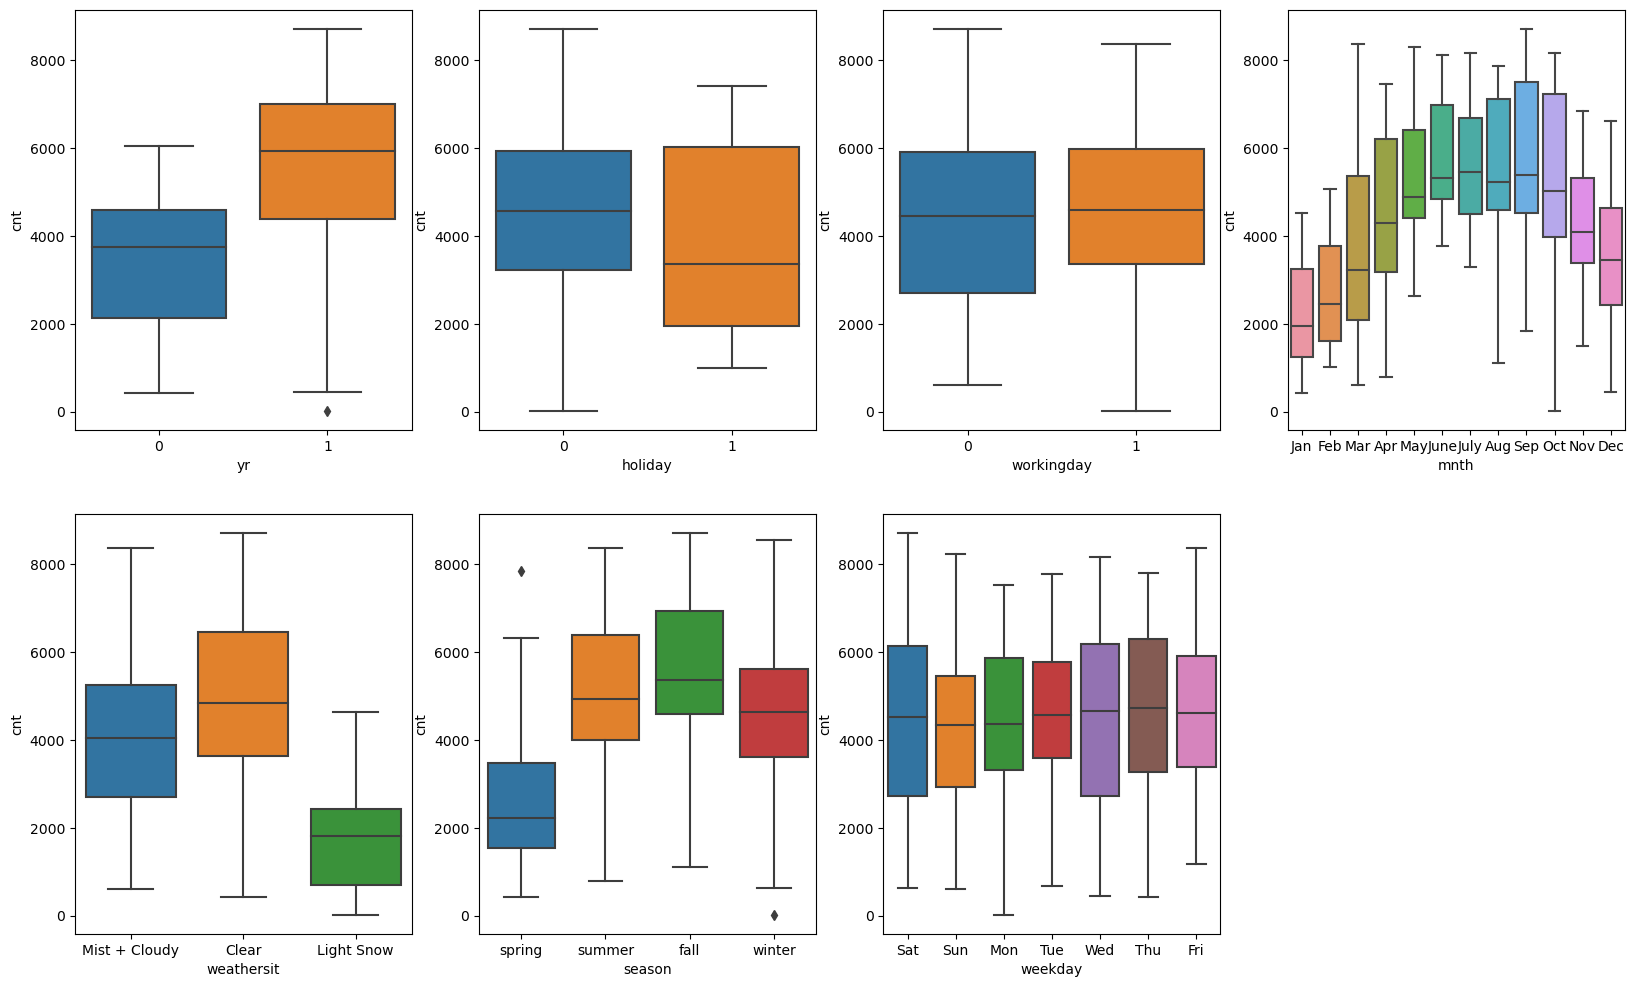

In [7]:
plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)

sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing)

plt.subplot(2,4,2)

sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)

plt.subplot(2,4,3)

sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)

plt.subplot(2,4,4)

sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)

plt.subplot(2,4,5)

sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)

plt.subplot(2,4,6)

sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)

plt.subplot(2,4,7)

sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)

plt.show()

#### The plots above show the relationship between categorical variables and the target variable 
- Bike rentals are more in the year 2019 compared to 2018
- Bike rentals are more in partly cloudy weather
- Bike rentals are more during the Fall season than in Summer
- Bike rentals are more on Saturday and Wednesday

### Bivariate with the target variable
1. Season

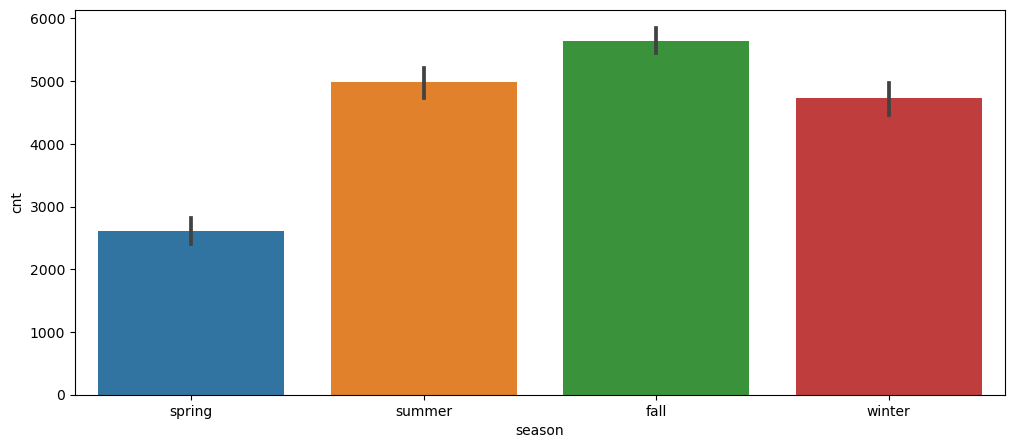

In [8]:
plt.figure(figsize=(12,5))

sns.barplot(x='season', y='cnt', data=bike_sharing)

plt.show()

The fall season gets the most bookings followed by summer

2. Year

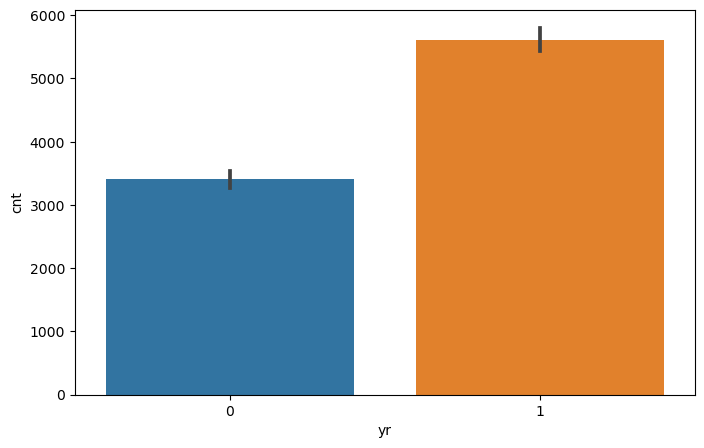

In [9]:
plt.figure(figsize=(8,5))

sns.barplot(x='yr', y='cnt', data=bike_sharing)

plt.show()

~62% of the rentals have been made in 2019, indicating a huge YOY jump in the business

3. Weathersit

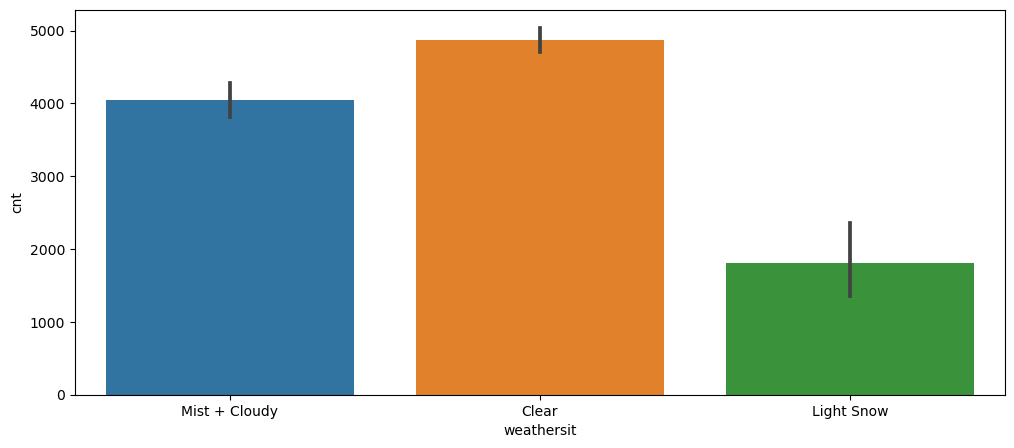

In [10]:
plt.figure(figsize=(12,5))

sns.barplot(x='weathersit', y='cnt', data=bike_sharing)

plt.show()

~70% of rentals have been made during the Clear weather

4. Month

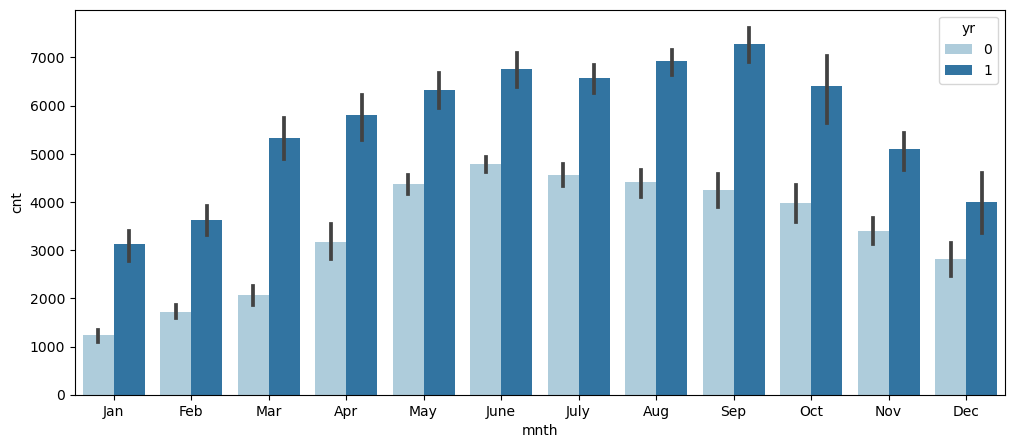

In [11]:
plt.figure(figsize=(12,5))
sns.barplot(x='mnth',y='cnt',hue='yr',data=bike_sharing,palette='Paired')
plt.show()

Rentals are more during the mid months of the year for both 2018 and 2019

5. Holiday

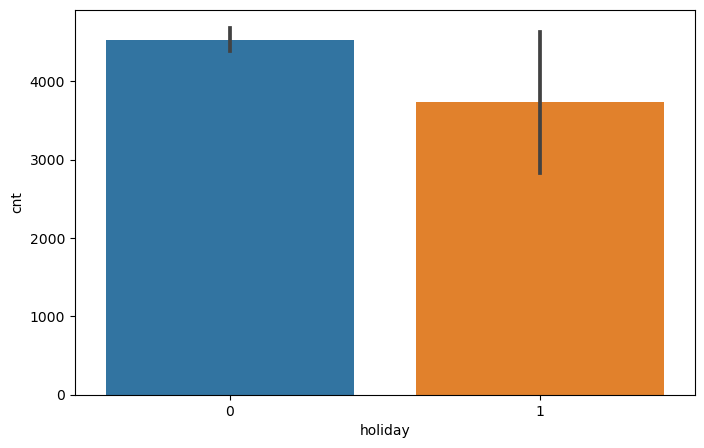

In [12]:
plt.figure(figsize=(8,5))

sns.barplot(x='holiday', y='cnt', data=bike_sharing)

plt.show()

Rentals are less during the holidays

6. Temperature

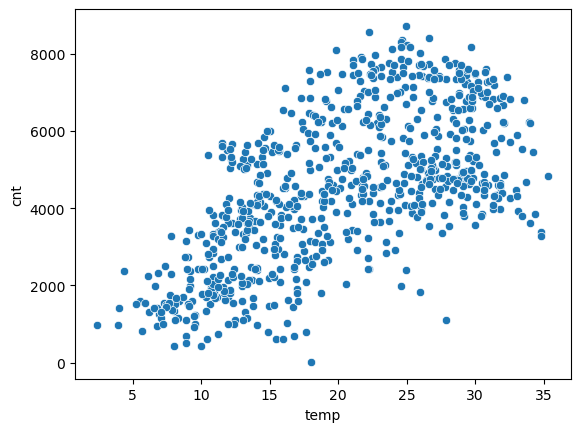

In [13]:
sns.scatterplot(x='temp',y='cnt',data=bike_sharing)

plt.show()

Rentals are increasing with increase in temperature

7. Humidity

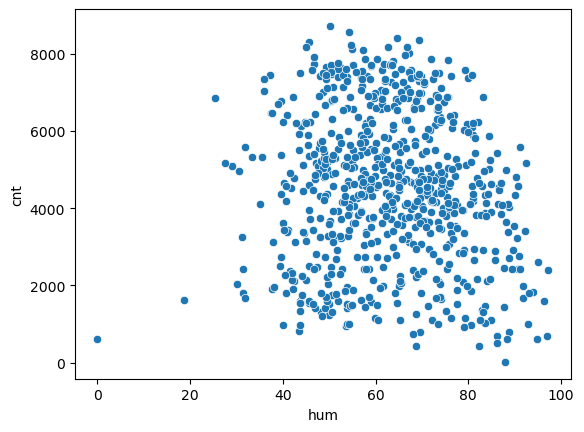

In [14]:
sns.scatterplot(x='hum',y='cnt',data=bike_sharing)

plt.show()

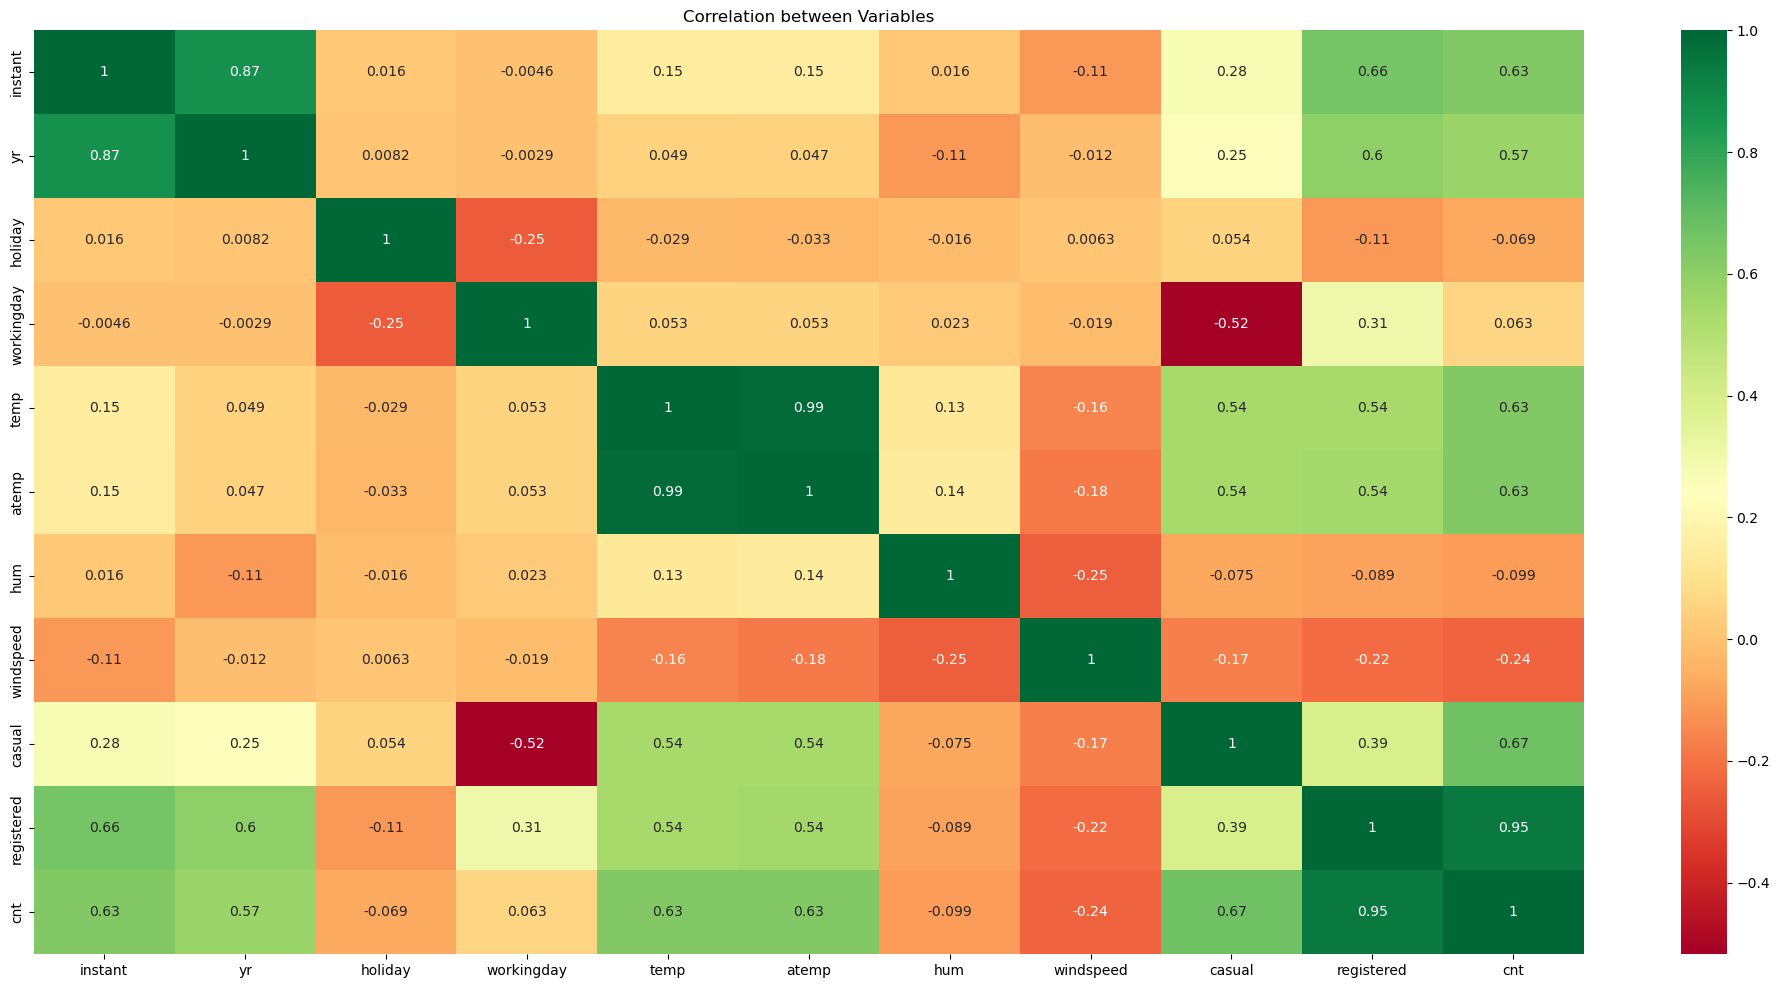

In [15]:
#Heatmap to see correlation between variables

plt.figure(figsize=(25, 12))

sns.heatmap(bike_sharing.corr(), cmap='RdYlGn', annot = True)

plt.title("Correlation between Variables")

plt.show()

From the above heatmap, we can see the temp and yr variables are highly correlated to 'cnt' variable
##### Thus we can proceed with the Linear Regression model

### Preparing data for modeling
Creating Dummy Variables

In [16]:
bike_sharing = pd.get_dummies(data=bike_sharing,columns=["season","mnth","weekday","weathersit"],drop_first=True)
#noticed that one of the criteria doesn't have data as mentioned in metadata

In [17]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   instant                   730 non-null    int64  
 1   dteday                    730 non-null    object 
 2   yr                        730 non-null    int64  
 3   holiday                   730 non-null    int64  
 4   workingday                730 non-null    int64  
 5   temp                      730 non-null    float64
 6   atemp                     730 non-null    float64
 7   hum                       730 non-null    float64
 8   windspeed                 730 non-null    float64
 9   casual                    730 non-null    int64  
 10  registered                730 non-null    int64  
 11  cnt                       730 non-null    int64  
 12  season_spring             730 non-null    uint8  
 13  season_summer             730 non-null    uint8  
 14  season_win

Drop unwanted columns.

These columns are either unwanted from base data set or we have deduced someother columns from it and hence not required anymore. instant is index column, cnt is the target variable and casual & registered are its split dteday is the date, but we already have year, month and weekdays info available as separate columns

In [18]:
#drop unwanted columns. These columns are either unwanted from base data set 
#or we have deduced someother columns from it and hence not required anymore

bike_sharing.drop({'instant', 'casual', 'registered', 'dteday'},axis=1,inplace=True)
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   yr                        730 non-null    int64  
 1   holiday                   730 non-null    int64  
 2   workingday                730 non-null    int64  
 3   temp                      730 non-null    float64
 4   atemp                     730 non-null    float64
 5   hum                       730 non-null    float64
 6   windspeed                 730 non-null    float64
 7   cnt                       730 non-null    int64  
 8   season_spring             730 non-null    uint8  
 9   season_summer             730 non-null    uint8  
 10  season_winter             730 non-null    uint8  
 11  mnth_Aug                  730 non-null    uint8  
 12  mnth_Dec                  730 non-null    uint8  
 13  mnth_Feb                  730 non-null    uint8  
 14  mnth_Jan  

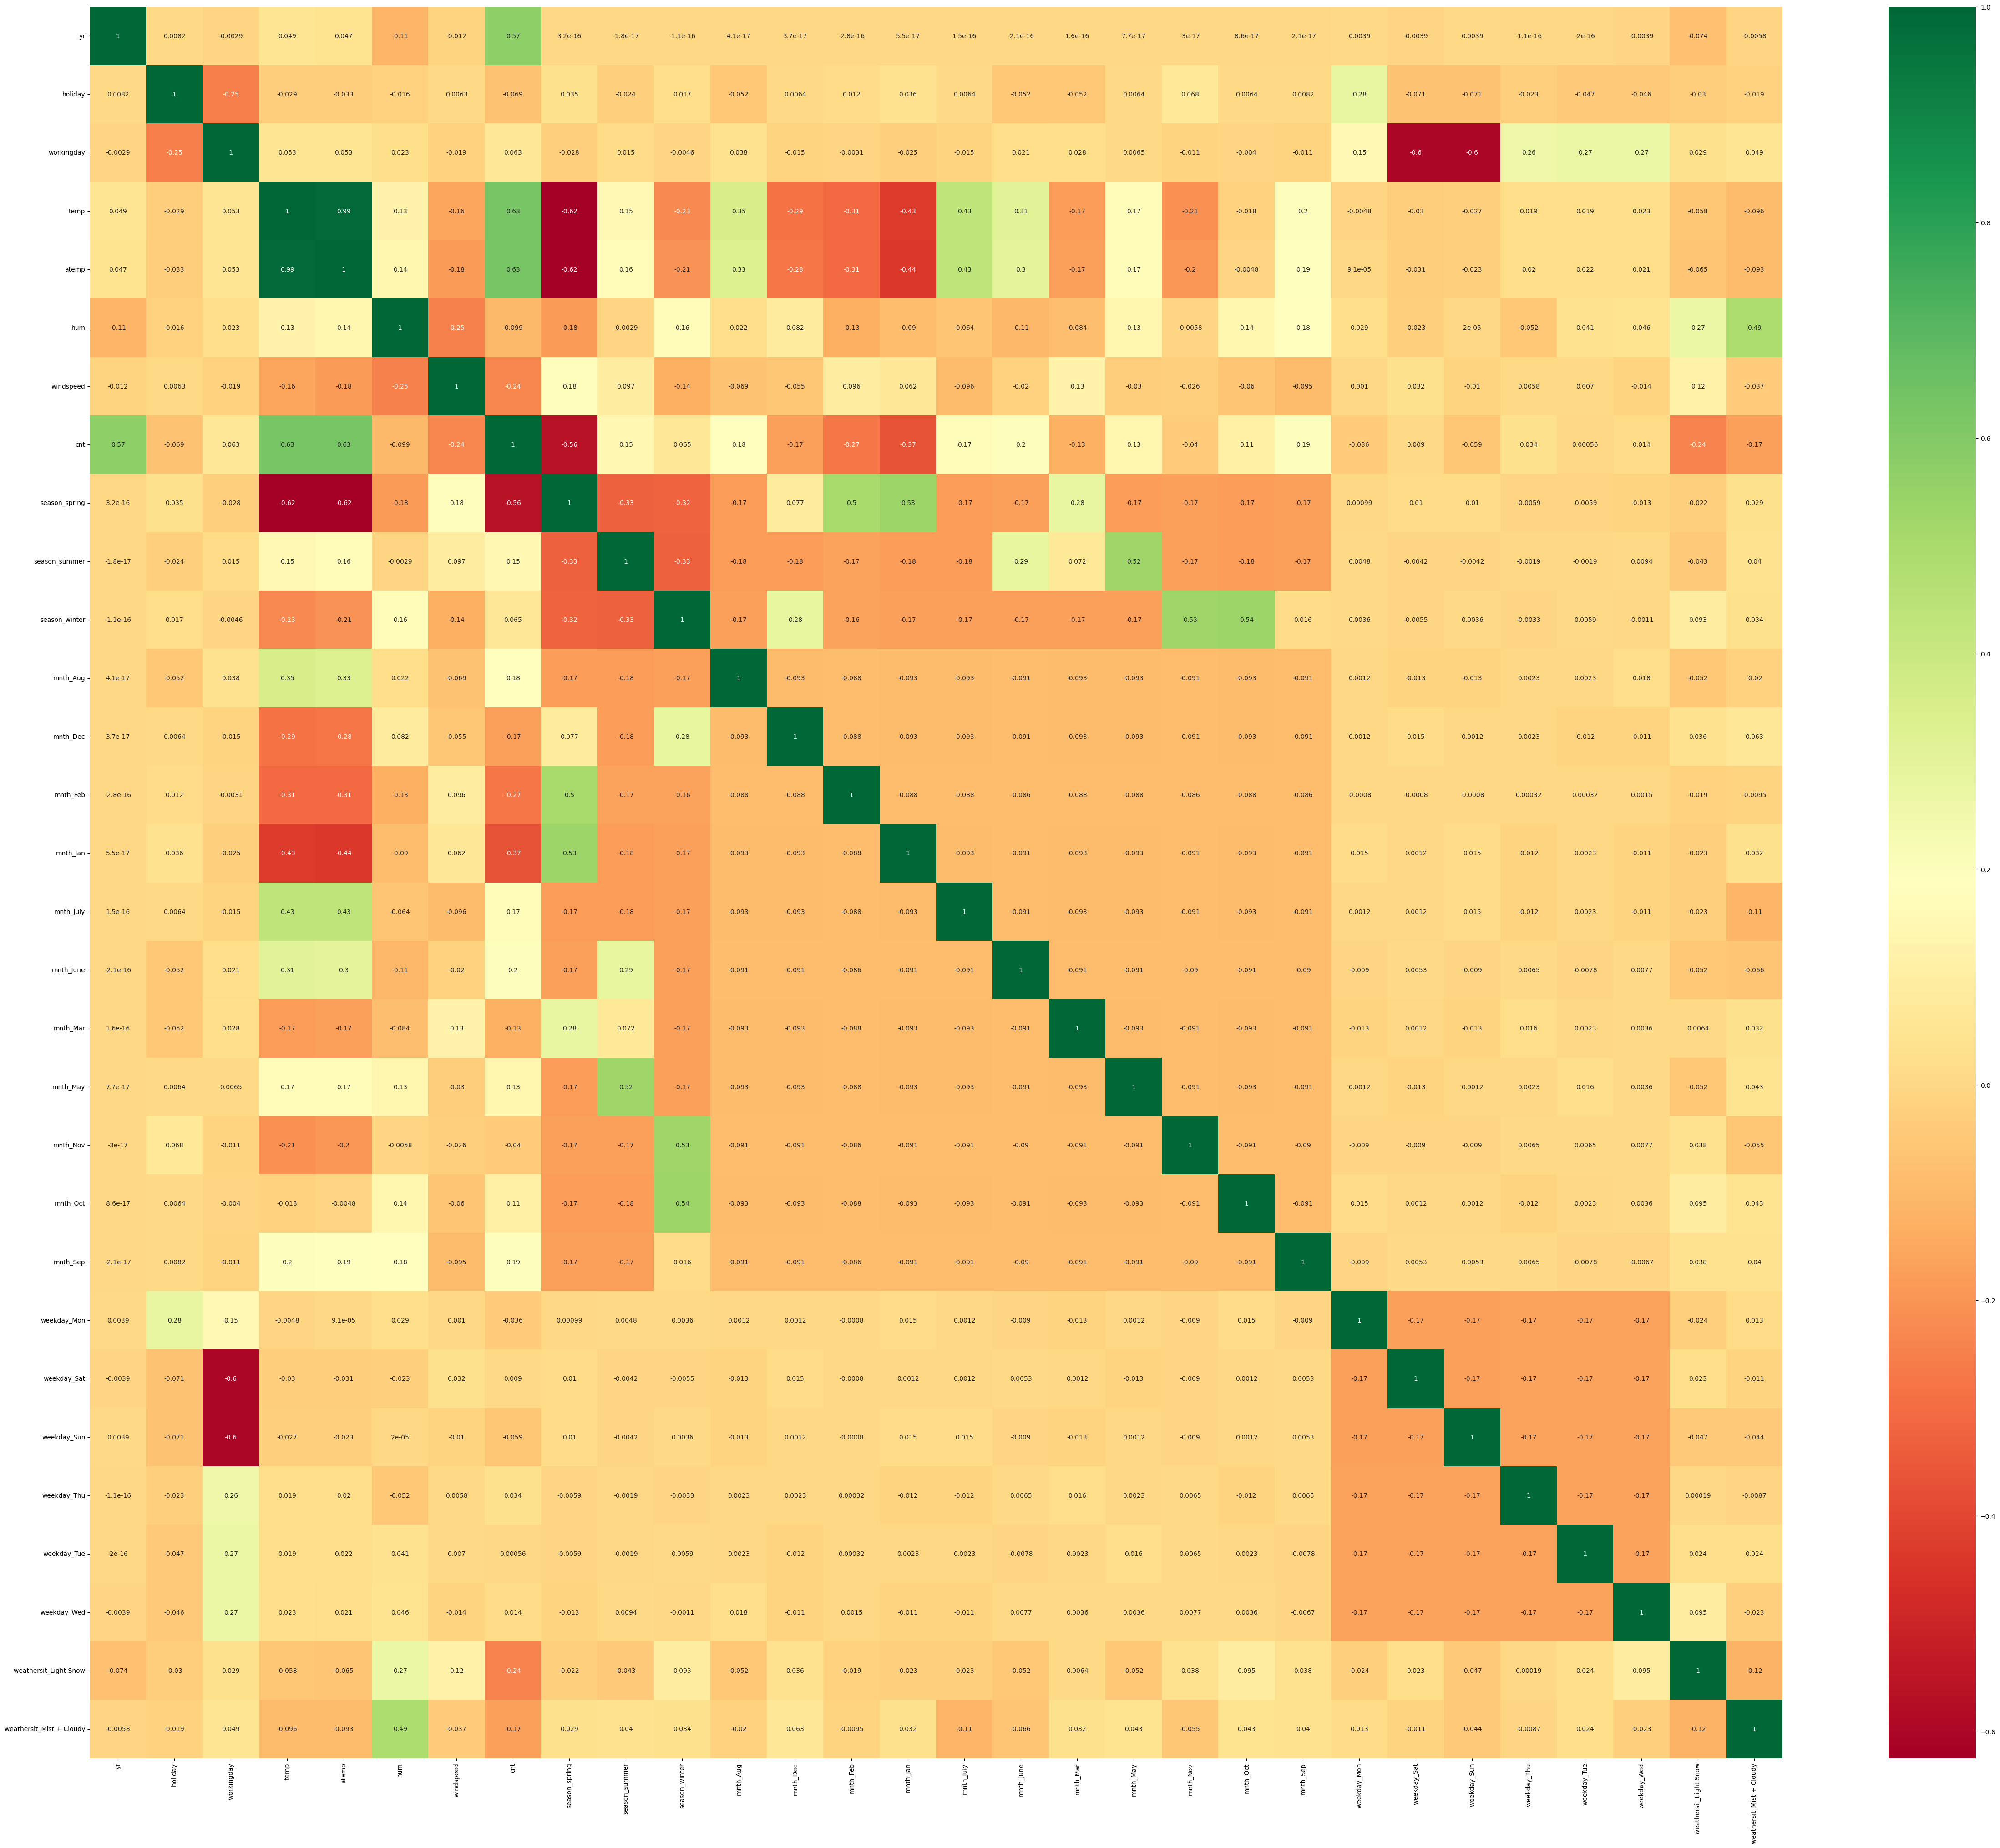

In [19]:
plt.figure(figsize=(60,50))
sns.heatmap(bike_sharing.corr(),cmap="RdYlGn",annot=True)
plt.show()

From the above heat chart,

- cnt has correlation with yr, temp and atemp.
- Weather winter has correlation with Months Oct & Nov and Summer with May, Spring with Jan & Feb.
- Working day has negative correlation with Saturday & Sunday
- Humidity has strong correlation to misty weather

### Splitting the data into train and test

In [20]:
bike_train, bike_test = train_test_split(bike_sharing, train_size = 0.7, random_state = 100)

In [21]:
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(220, 30)


In [22]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


### Scaling the features
It is important to have all the variables on the same scale for the model to be easily interpretable. We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale.
There are two common methods of scaling:

* Min-Max scaling or Normalisation: Values of variables are restricted between 0 and 1

* Standardisation : Mean of the variables becomes 0 and Standard Deviation 1

##### Min-Max scaling

In [23]:
#Instantiate an object
scaler = MinMaxScaler(feature_range=(0,1))

#Create a list of numeric variables
num_vars=['temp','atemp','hum','windspeed', 'cnt']

#Fit and transform on training data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

bike_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [24]:
#Checking the training data after scaling

pd.set_option('display.max_columns', None)

bike_train.describe()

#We can see that values of all the variables are between 0 and 1, so scaling is successful

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Training the model

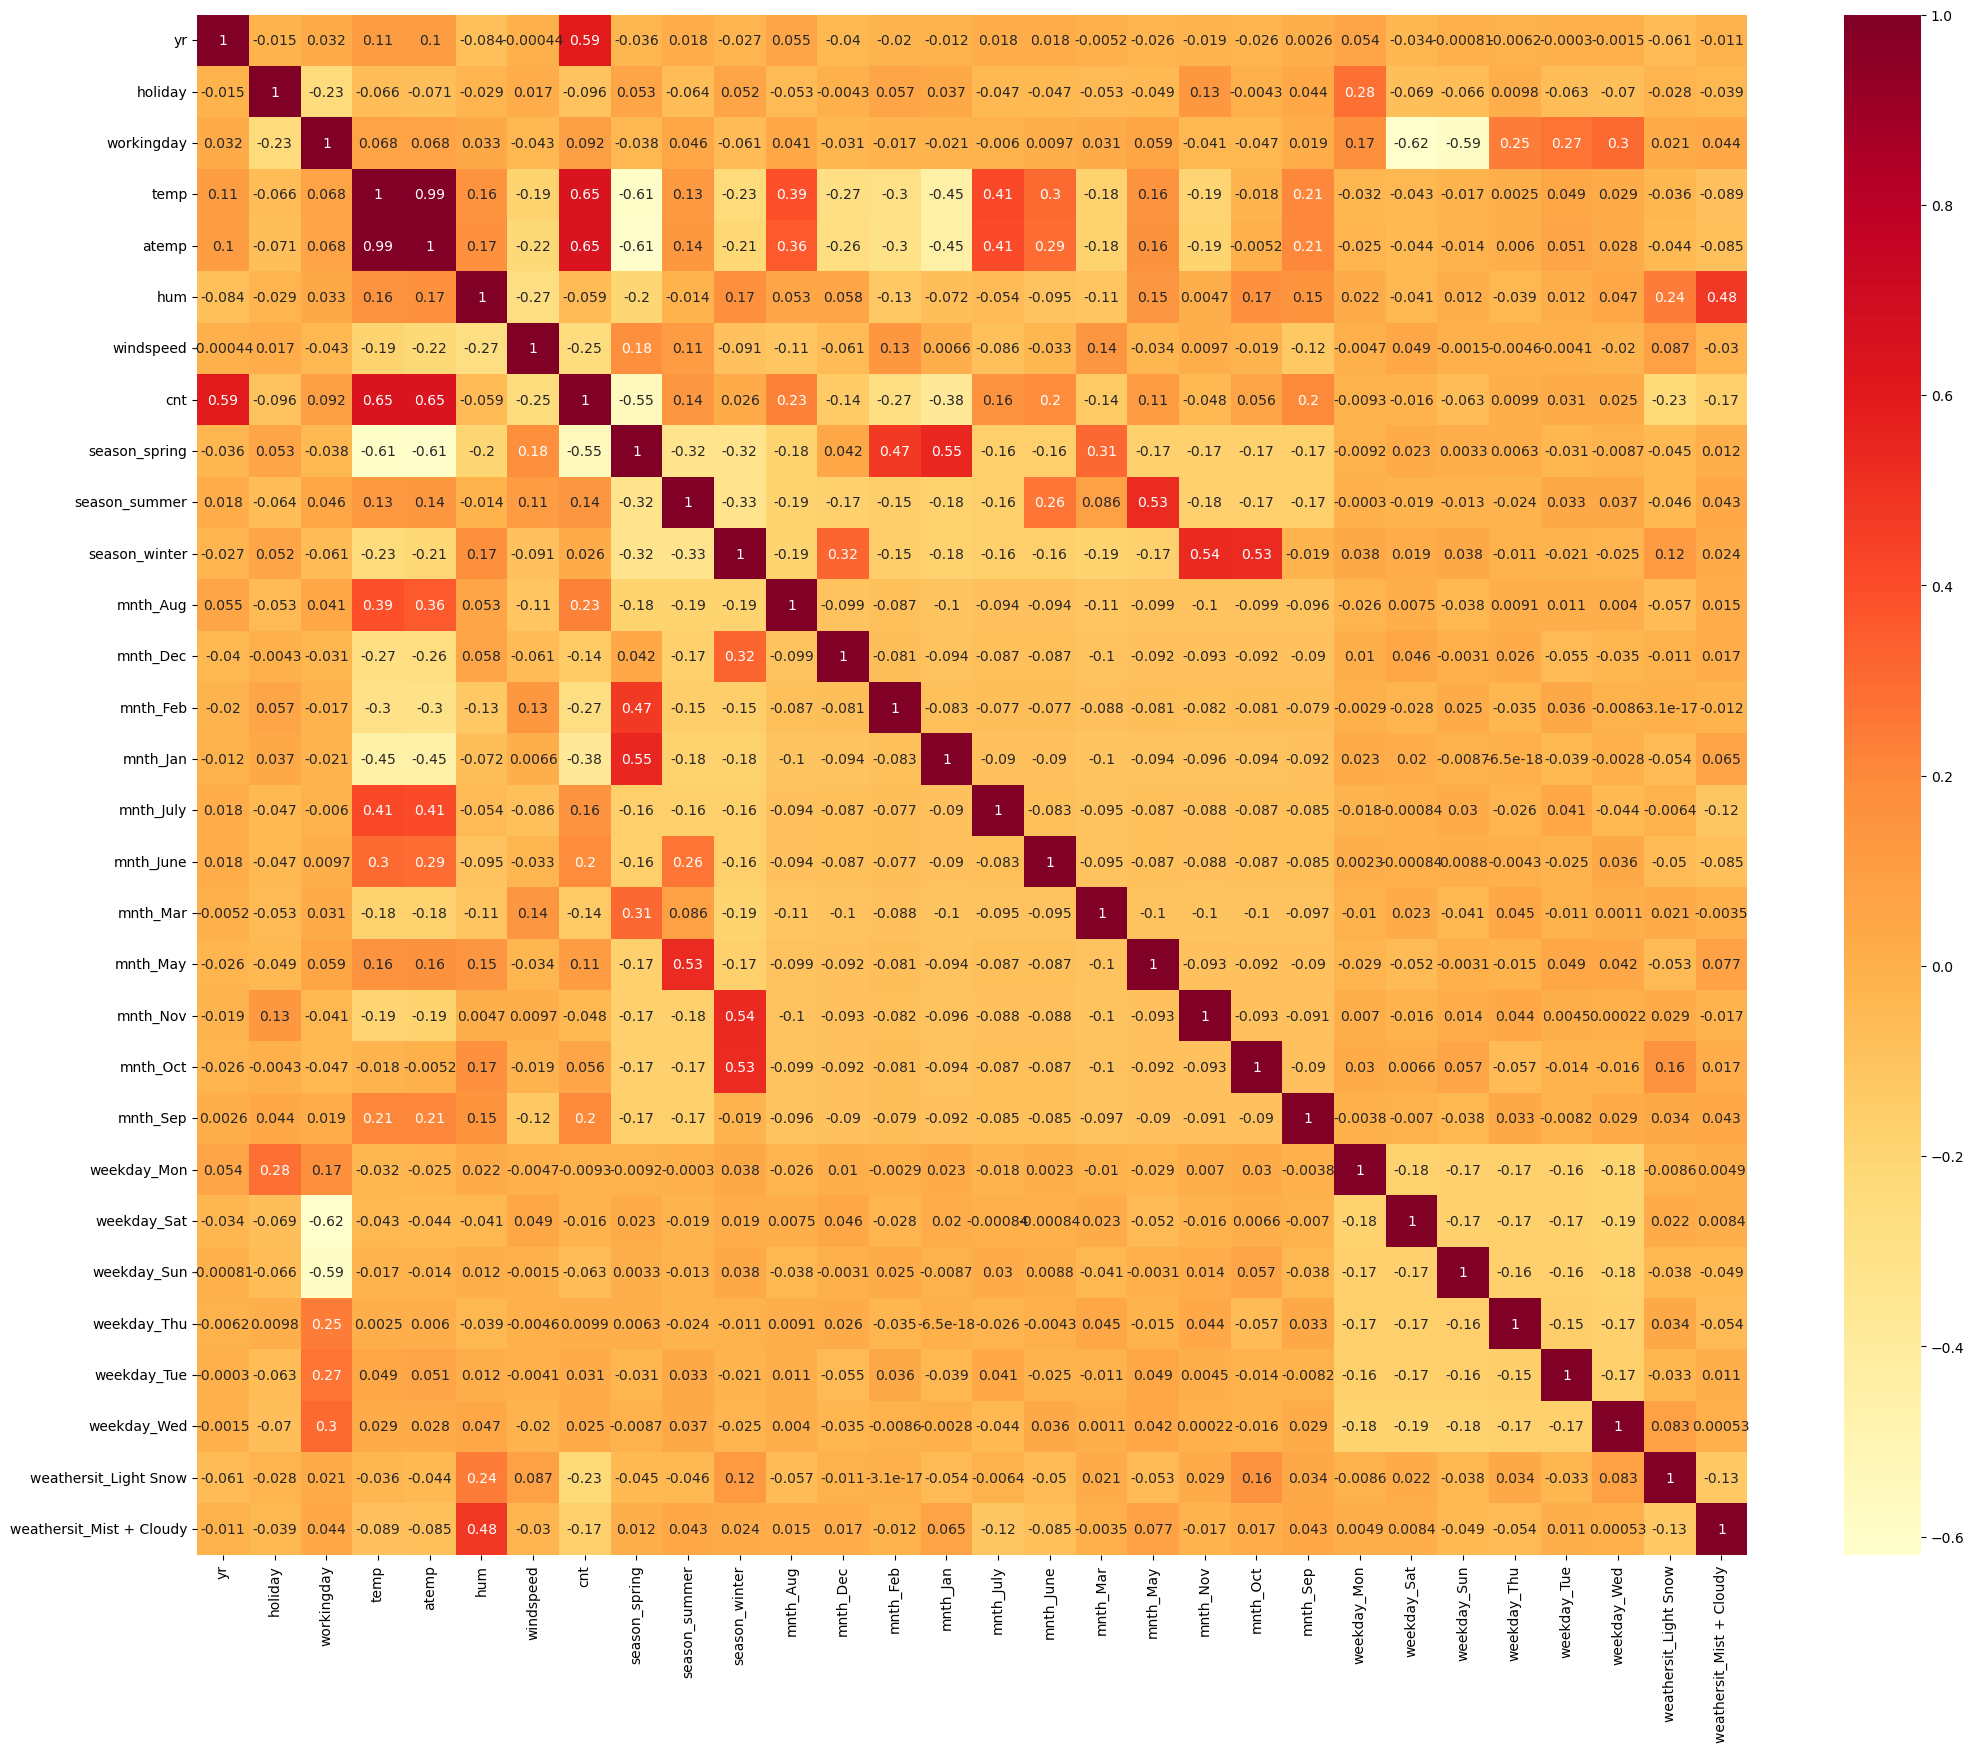

In [25]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling the training data

plt.figure(figsize=(25, 20))

sns.heatmap(bike_train.corr(),cmap='YlOrRd',annot = True)

plt.show()

### Defining the target and independent variables for model building

In [26]:
y_train = bike_train.pop('cnt')

X_train = bike_train

### Building a Linear Regression model
Using Recursive Feature Elimination as there are too many variables. Later on we can also do manual elimination

In [27]:
# Running RFE with number of variables equal to 15

lm = LinearRegression()

lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             

rfe = rfe.fit(X_train, y_train)

In [28]:
#List of variables selected

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 5),
 ('mnth_Dec', False, 13),
 ('mnth_Feb', False, 11),
 ('mnth_Jan', False, 3),
 ('mnth_July', True, 1),
 ('mnth_June', False, 15),
 ('mnth_Mar', False, 7),
 ('mnth_May', False, 4),
 ('mnth_Nov', False, 10),
 ('mnth_Oct', False, 2),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 14),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 12),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [29]:
#Columns with RFE support True

col = X_train.columns[rfe.support_]

col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_July',
       'mnth_Sep', 'weekday_Sat', 'weekday_Sun', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [30]:
#Columns where RFE support is False

X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

### Building model using statsmodels as it gives detailed statistics

In [31]:
# Creating new test dataframe with RFE selected variables

X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_July,mnth_Sep,weekday_Sat,weekday_Sun,weathersit_Light Snow,weathersit_Mist + Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1


In [32]:
#Adding a constant variable

X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_July,mnth_Sep,weekday_Sat,weekday_Sun,weathersit_Light Snow,weathersit_Mist + Cloudy
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,0,1
111,1.0,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1


In [33]:
# Running the linear model 

lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 18 Jun 2023   Prob (F-statistic):          2.11e-191
Time:                        23:01:03   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Checking VIF

In [34]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [35]:
# Calculate the VIF values

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,50.68
11,weekday_Sat,12.20
12,weekday_Sun,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.62
4,hum,1.91
14,weathersit_Mist + Cloudy,1.57


### Dropping holiday as it is insignificant due to high p-value

In [36]:
#Drop holiday
col = col.drop(["holiday"])
X_train_rfe1 = X_train_rfe.drop(["holiday"], axis = 1)

### Rebuilding the model without 'holiday'

In [37]:
X_train_lm1 = sm.add_constant(X_train_rfe1)

lm1 = sm.OLS(y_train,X_train_lm1).fit()

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 18 Jun 2023   Prob (F-statistic):          2.11e-191
Time:                        23:01:03   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Checking VIF again

In [38]:
#Dropping the constant

X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [39]:
# Calculate the VIF values

vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
10,weekday_Sat,4.91
5,season_spring,4.80
11,weekday_Sun,4.76
7,season_winter,3.69
6,season_summer,3.04
13,weathersit_Mist + Cloudy,2.31


### Dropping 'hum' variable as it has the highest VIF value

In [40]:
col = col.drop(["hum"])
X_train_rfe2 = X_train_rfe1.drop('hum', axis = 1)

X_train_rfe2.head()

,yr,workingday,temp,windspeed,season_spring,season_summer,season_winter,mnth_July,mnth_Sep,weekday_Sat,weekday_Sun,weathersit_Light Snow,weathersit_Mist + Cloudy
576,1,1,0.815169,0.264686,0,0,0,1,0,0,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,1,0,0,1
728,1,0,0.245101,0.663106,1,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.188475,0,1,0,0,0,1,0,0,1
111,0,1,0.345824,0.380981,0,1,0,0,0,0,0,0,1


### Rebuilding the model without 'hum'

In [41]:
X_train_lm2 = sm.add_constant(X_train_rfe2)

lm2 = sm.OLS(y_train,X_train_lm2).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Sun, 18 Jun 2023   Prob (F-statistic):          1.28e-188
Time:                        23:01:03   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Re-calculating VIF values

In [42]:
X_train_lm2 = X_train_lm2.drop(['const'], axis=1)

In [43]:
# Calculate the VIF values

vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,16.19
2,temp,12.74
3,windspeed,4.76
9,weekday_Sat,4.45
10,weekday_Sun,4.21
4,season_spring,3.82
6,season_winter,2.78
5,season_summer,2.76
0,yr,2.07
7,mnth_July,1.60


### Dropping 'workingday' next as it has the highest VIF value and no variable is insignificant as per p-value

In [44]:
col = col.drop(['workingday'])
X_train_rfe3 = X_train_rfe2.drop('workingday', axis=1)

X_train_rfe3.head()

,yr,temp,windspeed,season_spring,season_summer,season_winter,mnth_July,mnth_Sep,weekday_Sat,weekday_Sun,weathersit_Light Snow,weathersit_Mist + Cloudy
576,1,0.815169,0.264686,0,0,0,1,0,0,0,0,0
426,1,0.442393,0.255342,1,0,0,0,0,1,0,0,1
728,1,0.245101,0.663106,1,0,0,0,0,0,1,0,0
482,1,0.395666,0.188475,0,1,0,0,0,1,0,0,1
111,0,0.345824,0.380981,0,1,0,0,0,0,0,0,1


### Rebuilding the model without 'workingday'

In [45]:
X_train_lm3 = sm.add_constant(X_train_rfe3)

lm3 = sm.OLS(y_train,X_train_lm3).fit()

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Sun, 18 Jun 2023   Prob (F-statistic):          2.06e-186
Time:                        23:01:03   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Re-calculating the VIF values

In [46]:
X_train_lm3 = X_train_lm3.drop(['const'], axis=1)

In [47]:
# Calculate the VIF values

vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.18
2,windspeed,4.62
4,season_summer,2.24
3,season_spring,2.11
0,yr,2.07
5,season_winter,1.82
6,mnth_July,1.59
11,weathersit_Mist + Cloudy,1.55
7,mnth_Sep,1.33
8,weekday_Sat,1.22


### Dropping 'weekday_Sat' variable as it has high p-value

In [48]:
col = col.drop(['weekday_Sat'])
X_train_rfe4 = X_train_rfe3.drop('weekday_Sat', axis = 1)

X_train_rfe4.head()

,yr,temp,windspeed,season_spring,season_summer,season_winter,mnth_July,mnth_Sep,weekday_Sun,weathersit_Light Snow,weathersit_Mist + Cloudy
576,1,0.815169,0.264686,0,0,0,1,0,0,0,0
426,1,0.442393,0.255342,1,0,0,0,0,0,0,1
728,1,0.245101,0.663106,1,0,0,0,0,1,0,0
482,1,0.395666,0.188475,0,1,0,0,0,0,0,1
111,0,0.345824,0.380981,0,1,0,0,0,0,0,1


### Rebuilding the model without 'weekday_Sat' variable

In [49]:
X_train_lm4 = sm.add_constant(X_train_rfe4)

lm4 = sm.OLS(y_train,X_train_lm4).fit()

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Sun, 18 Jun 2023   Prob (F-statistic):          3.37e-187
Time:                        23:01:03   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Re-calculating VIF values

In [50]:
#Drop the constant

X_train_lm4 = X_train_lm4.drop(['const'], axis=1)

In [51]:
# Calculate the VIF values

vif = pd.DataFrame()
X = X_train_rfe4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.14
2,windspeed,4.60
4,season_summer,2.23
3,season_spring,2.09
0,yr,2.07
5,season_winter,1.80
6,mnth_July,1.59
10,weathersit_Mist + Cloudy,1.55
7,mnth_Sep,1.33
8,weekday_Sun,1.17


### Residual analysis

We need to check if the error terms are normally distributed as it is a major assumption of Linear Regression

In [52]:
#y train predicted

X_train_lm4 = sm.add_constant(X_train_rfe4) #adding the const again for the prediction

y_train_pred = lm4.predict(X_train_lm4)

<Axes: ylabel='Density'>

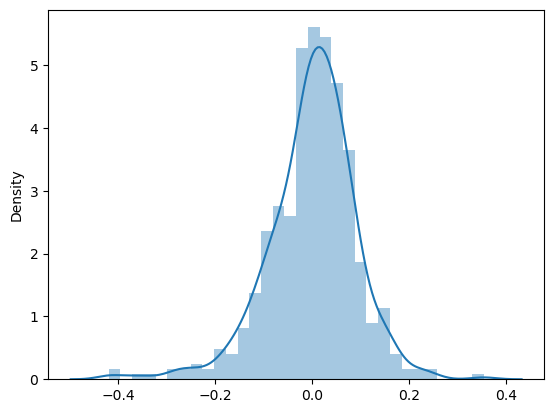

In [53]:
#Calculating and plotting the residual

res = y_train - y_train_pred

sns.distplot(res)

### Model Predictions and evaluations

In [54]:
pd.set_option('display.max_columns', None)
#Calculate R squared between train & train predicted data set
r2 = r2_score(y_train, y_train_pred)
#Calculate the adjusted R square of train set
ar2 = round(1 - (1-r2)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),4)
print("Train R square=",r2)
print("Train Adjusted R square=",ar2)

Train R square= 0.8355513232579529
Train Adjusted R square= 0.8256


In [55]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,20.808400,24.250312,61.934025,12.598352,4560.559091,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,7.672796,8.281075,14.429542,4.973534,1904.968544,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.119375,17.090025,51.354200,9.031466,3312.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.790424,24.700000,60.708350,12.188004,4582.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.299153,31.124313,72.179375,15.385361,5913.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
#scale the test data (previously we had scaled only train data set)
bike_test[num_vars] = scaler.fit_transform(bike_test[num_vars])
y_test = bike_test.pop('cnt')
X_test = bike_test

In [57]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [58]:
#Predict test data values
col_sm = sm.add_constant(X_test[col])
lm = sm.OLS(y_test,col_sm).fit()
y_test_pred = lm.predict(col_sm)

In [59]:
#Calculate R squared between test & test predicted data set
r2 = r2_score(y_test,y_test_pred)
#Calculate the adjusted R square of test set
ar2 = round(1 - (1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print("Test R square=",r2)
print("Test Adjusted R square=",ar2)

Test R square= 0.8199445289707903
Test Adjusted R square= 0.7925


Train dataset and Test data set R-squared values are almost same.

### Checking for Homoscedasticity

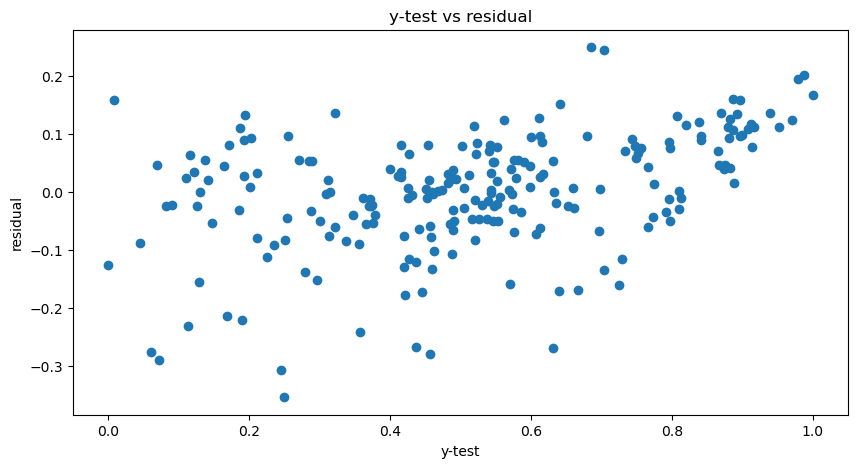

In [60]:
plt.figure(figsize=(10, 5))

res_test = y_test - y_test_pred

plt.scatter(y_test, res_test)
plt.title("y-test vs residual")
plt.xlabel("y-test")
plt.ylabel("residual")

plt.show()

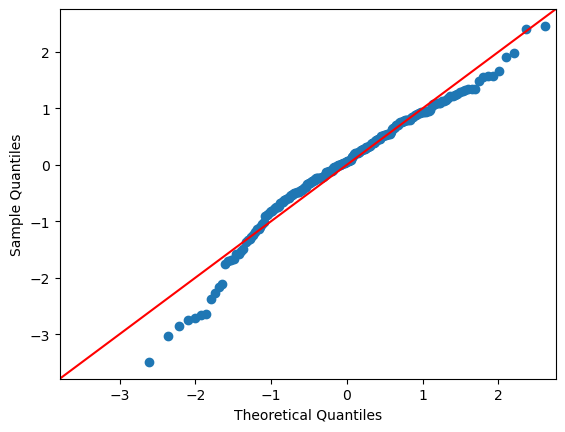

In [61]:
sm.qqplot(res_test, fit=True, line='45')
plt.show()

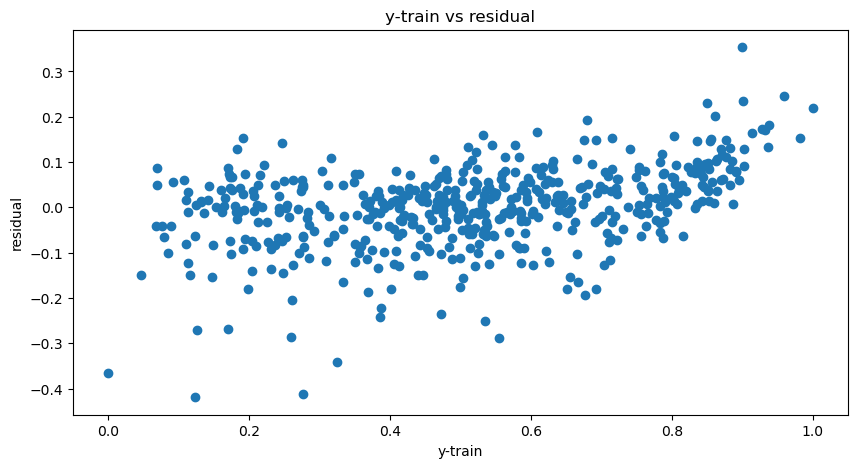

In [62]:
plt.figure(figsize=(10, 5))

res = y_train - y_train_pred #residual value for train

plt.scatter(y_train, res)
plt.title("y-train vs residual")
plt.xlabel("y-train")
plt.ylabel("residual")

plt.show()

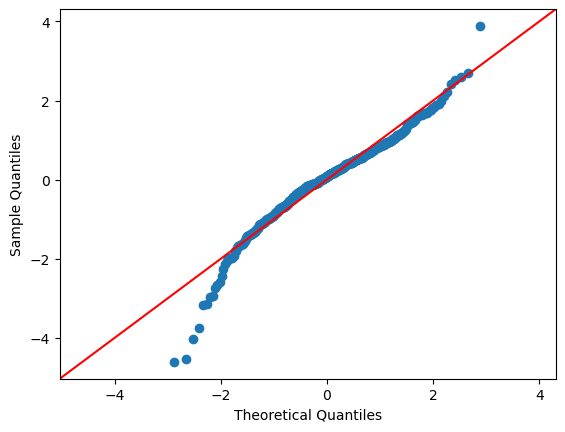

In [63]:
sm.qqplot(res, fit=True, line='45')
plt.show()

We can see that the errors in the model do not vary much and are equally spread, so we can safely assume that the condition of homoscedasticity is satisfied

### Regression plot

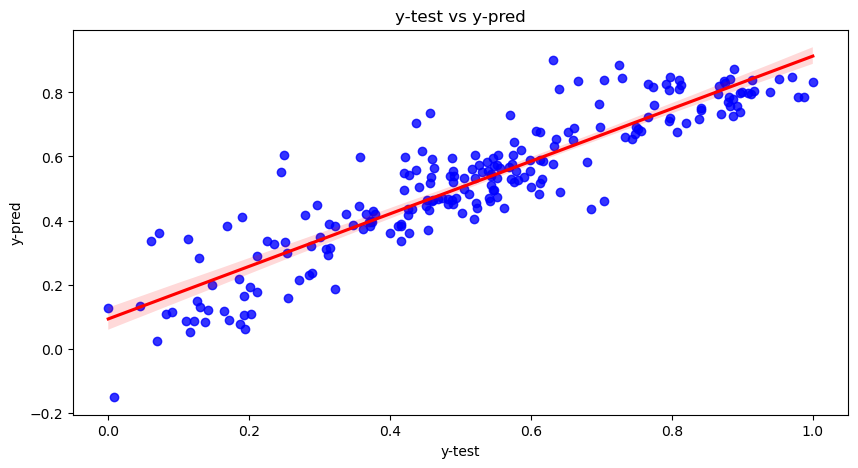

In [64]:
plt.figure(figsize=(10, 5))

sns.regplot(x=y_test, y=y_test_pred, fit_reg= True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title("y-test vs y-pred")
plt.xlabel("y-test")
plt.ylabel("y-pred")

plt.show()

In [65]:
round(lm.params,4)

const                       0.2347
yr                          0.2646
temp                        0.4237
windspeed                  -0.0380
season_spring              -0.1591
season_summer               0.0096
season_winter               0.0634
mnth_July                  -0.0489
mnth_Sep                    0.0466
weekday_Sun                -0.0311
weathersit_Light Snow      -0.2687
weathersit_Mist + Cloudy   -0.0748
dtype: float64

Equation for best fit line is

cnt = 0.2347 + (0.2534 * yr) + (0.4237 * temp) - (0.0380 * windspeed) - (0.1591 * season_spring) + (0.0096 * summer_season) + (0.0634 * season_Winter) - (0.0489 * mnth_July) + (0.0466 * mnth_Sep)- ( 0.0311 * weekday_Sun) - (0.2687 * weathersit_Light Snow) - (0.0748 * weathersit_Mist + Cloudy)

#### Model results comparison between train and test data:
Train R square= 0.8355513232579529
Train Adjusted R square= 0.8256
Test R square= 0.8199445289707903
Test Adjusted R square= 0.7925
Difference in Train and Test R squared: 1.6%
As the difference in R squared values is <5%, the model is performing quite well

Model Interpretation and business strategy:
Our model to predict the demand for shared bikes is doing quite well with the given set of independent variables

The temperature variable has the highest coefficient 0.4237, which means if the temperature rises by 1 unit, the number of bike rentals increases by 0.4237

The Light Snow and the Mist+Cloudy variables have negative coefficients, which means a reduction in bike rentals

The windspeed variable also has a negative coefficient, which means a reduction in bike rentals with increase in the windspeed

Spring season has negative coefficients, so the company can run some discount offers to attract the customers to book more

Sunday is seeing a drop in bookings so the company can run some promotional events in and around parks and leisure spots